In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpdm407sdqGP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrasound_Images.npy', allow_pickle=True)
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrasound_masks.npy', allow_pickle=True)

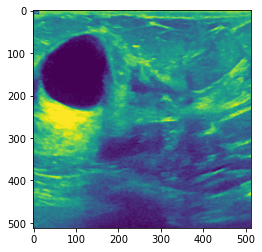

In [5]:
plt.imshow(images[1])

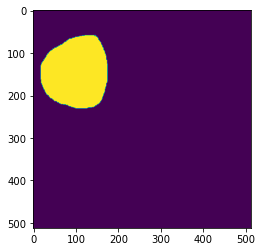

In [6]:
plt.imshow(masks[1])

In [7]:
len(images)

780

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=780, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 1.8886 - dice_coeff: 0.1150 - val_loss: 1.9364 - val_dice_coeff: 0.1044
Epoch 2/100
1/1 [==============================] - 1s 955ms/step - loss: 1.7695 - dice_coeff: 0.1195 - val_loss: 1.8055 - val_dice_coeff: 0.1043
Epoch 3/100
1/1 [==============================] - 1s 884ms/step - loss: 1.6939 - dice_coeff: 0.1233 - val_loss: 1.7811 - val_dice_coeff: 0.1043
Epoch 4/100
1/1 [==============================] - 1s 867ms/step - loss: 1.6486 - dice_coeff: 0.1282 - val_loss: 1.7490 - val_dice_coeff: 0.1043
Epoch 5/100
1/1 [==============================] - 1s 863ms/step - loss: 1.6166 - dice_coeff: 0.1299 - val_loss: 1.7458 - val_dice_coeff: 0.1043
Epoch 6/100
1/1 [==============================] - 1s 925ms/step - loss: 1.5961 - dice_coeff: 0.1322 - val_loss: 1.7173 - val_dice_coeff: 0.1043
Epoch 7/100
1/1 [==============================] - 1s 907ms/step - loss: 1.5914 - dice_coeff: 0.1296 - val_loss: 1.7131 

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 1.2995 - dice_coeff: 0.2141 - val_loss: 1.6036 - val_dice_coeff: 0.1045
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.2921 - dice_coeff: 0.2212 - val_loss: 1.6051 - val_dice_coeff: 0.1045
Epoch 3/100
1/1 [==============================] - 1s 990ms/step - loss: 1.2934 - dice_coeff: 0.2136 - val_loss: 1.6018 - val_dice_coeff: 0.1045
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.2763 - dice_coeff: 0.2233 - val_loss: 1.6020 - val_dice_coeff: 0.1045
Epoch 5/100
1/1 [==============================] - 1s 975ms/step - loss: 1.2642 - dice_coeff: 0.2296 - val_loss: 1.6004 - val_dice_coeff: 0.1045
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 1.2560 - dice_coeff: 0.2314 - val_loss: 1.5997 - val_dice_coeff: 0.1045
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 1.2542 - dice_coeff: 0.2340 - val_loss: 1.5983 - val_dice_coeff: 0.1045


Epoch 1/100
2/2 [==============================] - 8s 3s/step - loss: 1.3073 - dice_coeff: 0.1759 - val_loss: 1.5599 - val_dice_coeff: 0.1043
Epoch 2/100
2/2 [==============================] - 1s 572ms/step - loss: 1.3269 - dice_coeff: 0.2339 - val_loss: 1.5576 - val_dice_coeff: 0.1044
Epoch 3/100
2/2 [==============================] - 1s 489ms/step - loss: 1.3677 - dice_coeff: 0.1839 - val_loss: 1.5544 - val_dice_coeff: 0.1043
Model saved to /tmp/tmpdm407sdqGP2/unet_4.model
History saved to /tmp/tmpdm407sdqGP2/history_4.pickle
Testing the classifier...
8/8 [==============================] - 1s 88ms/step - loss: 1.5322 - dice_coeff: 0.1159
Testing the discriminator...
2/2 [==============================] - 0s 17ms/step - loss: 0.5222 - accuracy: 0.9565
Found 19 machine labels.
Machine labels [ 4  5  8 14 17 19 22 23 27 30 31 34 35 37 39 41 42 43 44]
D_ids ['fbb6e2f5-6b8e-4cdf-857d-6d9e0ad47952', '03e90107-5d3b-4272-9528-46a00d6981fe', '2ce009dc-747d-415e-a03f-d25790d09d6b', 'b36452ce-f

In [12]:
R.classifier_scores

[[1.6170085668563843, 0.1357230246067047],
 [1.578179121017456, 0.12811148166656494],
 [1.5442472696304321, 0.12003370374441147],
 [1.5435856580734253, 0.11701584607362747],
 [1.532190203666687, 0.11588716506958008]]

In [13]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0952625498175621, 0.97826087474823],
 [0.522153913974762, 0.95652174949646]]

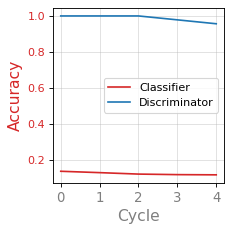

In [14]:
R.plot()